In [1]:
import pandas as pd
from scipy import stats
df=pd.read_csv("HotelClickStream1.csv")
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


In [2]:
print(df.columns.values)
print (df.info())
print (df.shape)

['ID' 'DOMAIN_ID' 'MACHINE_ID' 'SITE_SESSION_ID' 'TRANS_FREQ'
 'DOMAIN_NAME' 'DIRECTP_D' 'PROD_NAME' 'PROD_QTY' 'PROD_TOTPRICE'
 'REF_DOMAIN_NAME' 'DURATION' 'PAGES_VIEWED' 'HOUSEHOLD_SIZE' 'CHILDREN_D'
 'CONNECTIONSPEED_D']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3749 non-null   int64  
 1   DOMAIN_ID          3749 non-null   uint64 
 2   MACHINE_ID         3749 non-null   int64  
 3   SITE_SESSION_ID    3749 non-null   int64  
 4   TRANS_FREQ         3749 non-null   int64  
 5   DOMAIN_NAME        3749 non-null   object 
 6   DIRECTP_D          3749 non-null   int64  
 7   PROD_NAME          3749 non-null   object 
 8   PROD_QTY           3749 non-null   int64  
 9   PROD_TOTPRICE      3749 non-null   float64
 10  REF_DOMAIN_NAME    1687 non-null   object 
 11  DURATION           3749 non-null   floa

# Section A: Explorative analysis 1A

In [3]:
if 'DOMAIN_NAME' in df.columns:
    domain_counts= df['DOMAIN_NAME'].value_counts()#.reset.index()
    domain_counts.columns= ['DOMAIN_NAME', 'Transaction_Count']
    top_10= domain_counts.head(10)
    print (top_10)
else:
    print("error")

DOMAIN_NAME
marriott.com        524
hilton.com          438
hotels.com          400
expedia.com         380
priceline.com       309
choicehotels.com    297
jetblue.com         229
hotwire.com         217
bestwestern.com     120
orbitz.com          109
Name: count, dtype: int64


# 1.B.

In [4]:
if 'REF_DOMAIN_NAME' in df.columns:
    domain_counts= df['REF_DOMAIN_NAME'].value_counts()#.reset.index()
    domain_counts.columns= ['REF_DOMAIN_NAME', 'Transaction_Count']
    top_10= domain_counts.head(10)
    print (top_10)
else:
    print("error")

REF_DOMAIN_NAME
google.com           620
yahoo.com            222
bing.com             129
aol.com               53
comfortinn.com        48
jetblue.com           43
qualityinn.com        29
comfortsuites.com     22
kayak.com             20
mywebsearch.com       17
Name: count, dtype: int64


# 2.A.

In [5]:
import numpy as np
df['REF_D'] = np.where(df['REF_DOMAIN_NAME'].isnull(), 0, 1)

# 2.B.

In [7]:
df['LOG_PRICE']=np.log1p(df.PROD_TOTPRICE)
df.columns
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.494430


# 3.A.

In [8]:
selected_vars = ['DIRECTP_D', 'REF_D', 'DURATION', 'PAGES_VIEWED', 'LOG_PRICE', 'TRANS_FREQ']
selected_df = df[selected_vars]

# Calculate summary statistics
summary_stats = selected_df.agg(['count', 'max', 'min', 'mean', 'std'])

# Rename 'count' to 'N' for clarity
summary_stats = summary_stats.rename(index={'count': 'count'})

# Transpose the table for better readability
summary_stats = summary_stats.T

# Print the summary statistics table
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
               count         max       min       mean        std
DIRECTP_D     3749.0    1.000000  0.000000   0.481462   0.499723
REF_D         3749.0    1.000000  0.000000   0.449987   0.497559
DURATION      3749.0  227.343750  0.029999  25.317508  22.806497
PAGES_VIEWED  3749.0  141.000000  1.000000  18.331288  16.636523
LOG_PRICE     3749.0    7.954386  0.000000   4.439926   1.615478
TRANS_FREQ    3749.0   30.000000  1.000000   2.981328   4.120927


# 3.B.

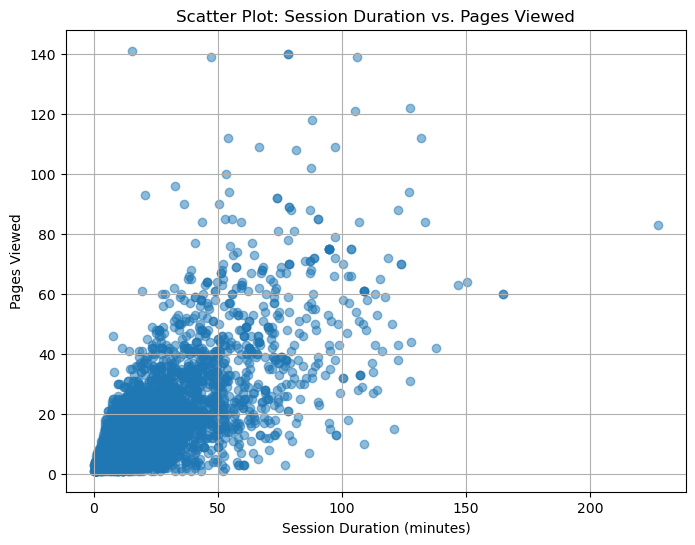

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(df['DURATION'], df['PAGES_VIEWED'], alpha=0.5)
plt.title('Scatter Plot: Session Duration vs. Pages Viewed')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Pages Viewed')
plt.grid(True)
plt.show()

C:\Users\lasya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


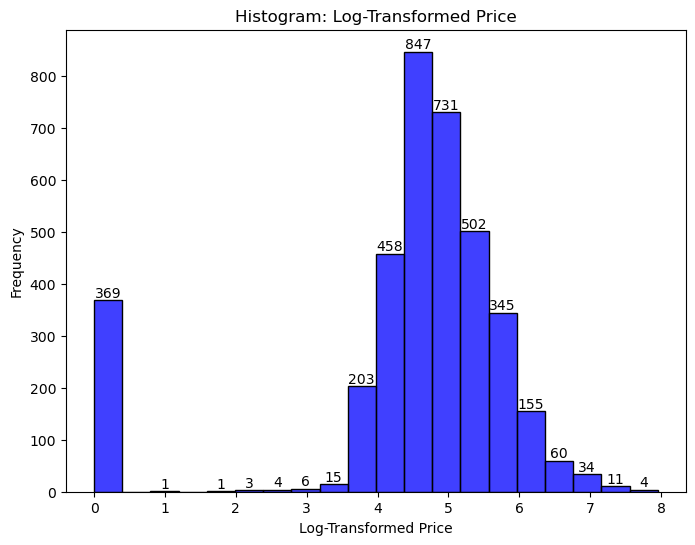

In [10]:
plt.figure(figsize=(8, 6))
#plt.hist(df['LOG_PRICE'], bins=20, edgecolor='black')
ax = sns.histplot(df['LOG_PRICE'], bins=20, color='blue')# Add numbers on top of each bar

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid displaying 0 labels
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Histogram: Log-Transformed Price')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
#plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [11]:
df['DOMAIN_NAME'] = df['DOMAIN_NAME'].astype('category')
df['DOMAINNAME_CATEGORY']=df['DOMAIN_NAME'].cat.codes
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE',
       'DOMAINNAME_CATEGORY'],
      dtype='object')

In [12]:
df.head(5)


,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE,DOMAINNAME_CATEGORY
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0,7.954386,13
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786527,17
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.682022,12
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0,7.580547,7
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.494430,24


# Section B: Regression analysis
 # 1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
#df.corr(method="pearson")

In [14]:
numerical_cols = ['DURATION', 'TRANS_FREQ', 'DOMAINNAME_CATEGORY', 'DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE', 'REF_D', 'CONNECTIONSPEED_D','CHILDREN_D']
numerical_df = df[numerical_cols]
correlations = numerical_df.corr()['DURATION'].sort_values(ascending=False)
print("Correlations with DURATION:\n", correlations)

Correlations with DURATION:
 DURATION               1.000000
PAGES_VIEWED           0.685071
PROD_QTY               0.127122
DOMAINNAME_CATEGORY    0.058986
CHILDREN_D             0.044570
PROD_TOTPRICE          0.032113
REF_D                  0.003514
TRANS_FREQ            -0.010917
HOUSEHOLD_SIZE        -0.014173
CONNECTIONSPEED_D     -0.021533
DIRECTP_D             -0.182002
Name: DURATION, dtype: float64


In [15]:
stats.pearsonr(x=df["TRANS_FREQ"], y=df["DURATION"])

PearsonRResult(statistic=-0.010916691311282867, pvalue=0.5039957528908791)

In [16]:
stats.pearsonr(x=df["DOMAINNAME_CATEGORY"], y=df["DURATION"])

PearsonRResult(statistic=0.05898643996132516, pvalue=0.0003019427518841679)

In [17]:
stats.pearsonr(x=df["DIRECTP_D"], y=df["DURATION"])

PearsonRResult(statistic=-0.18200167861759042, pvalue=2.77535432067049e-29)

In [18]:
stats.pearsonr(x=df["PROD_QTY"], y=df["DURATION"])

PearsonRResult(statistic=0.12712173377243735, pvalue=5.599137610094796e-15)

In [19]:
stats.pearsonr(x=df["PROD_TOTPRICE"], y=df["DURATION"])

PearsonRResult(statistic=0.03211347865680612, pvalue=0.049283588974815114)

In [20]:
stats.pearsonr(x=df["PAGES_VIEWED"], y=df["DURATION"])

PearsonRResult(statistic=0.6850714969488454, pvalue=0.0)

In [21]:
stats.pearsonr(x=df["REF_D"], y=df["DURATION"])

PearsonRResult(statistic=0.003513510736149173, pvalue=0.829722140140584)

In [22]:
stats.pearsonr(x=df["HOUSEHOLD_SIZE"], y=df["DURATION"])

PearsonRResult(statistic=-0.014173327092272207, pvalue=0.3856276233846331)

In [23]:
stats.pearsonr(x=df["CONNECTIONSPEED_D"], y=df["DURATION"])

PearsonRResult(statistic=-0.02153259465426687, pvalue=0.1874587698833819)

In [24]:
stats.pearsonr(x=df["CHILDREN_D"], y=df["DURATION"])

PearsonRResult(statistic=0.04457028022911284, pvalue=0.006344132849180818)

In [25]:
import statsmodels.api as sm

In [26]:
mod = sm.OLS(df.DURATION,df[["DOMAINNAME_CATEGORY","PAGES_VIEWED","PROD_QTY"]])
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               DURATION   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              3874.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                        0.00
Time:                        16:24:24   Log-Likelihood:                         -15902.
No. Observations:                3749   AIC:                                  3.181e+04
Df Residuals:                    3746   BIC:                                  3.183e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [27]:
indepvar=sm.add_constant(df[["DOMAINNAME_CATEGORY","PAGES_VIEWED","PROD_QTY"]])

In [28]:
mod=sm.OLS(df.DURATION, indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1112.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:24:24   Log-Likelihood:                -15849.
No. Observations:                3749   AIC:                         3.171e+04
Df Residuals:                    3745   BIC:                         3.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.3384    

# 2

In [29]:
numerical_cols = ['PAGES_VIEWED','DURATION', 'TRANS_FREQ', 'DOMAINNAME_CATEGORY', 'DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE', 'HOUSEHOLD_SIZE', 'REF_D', 'CHILDREN_D', 'CONNECTIONSPEED_D','CHILDREN_D']
numerical_df = df[numerical_cols]
correlations = numerical_df.corr()['PAGES_VIEWED']#.sort_values(ascending=False)
print("Correlations with PAGES_VEIWED:\n", correlations)

Correlations with PAGES_VEIWED:
 PAGES_VIEWED           1.000000
DURATION               0.685071
TRANS_FREQ             0.025028
DOMAINNAME_CATEGORY    0.097144
DIRECTP_D             -0.065661
PROD_QTY               0.126278
PROD_TOTPRICE         -0.024857
HOUSEHOLD_SIZE        -0.008607
REF_D                 -0.007442
CHILDREN_D             0.033867
CONNECTIONSPEED_D     -0.007393
CHILDREN_D             0.033867
Name: PAGES_VIEWED, dtype: float64


In [30]:
stats.pearsonr(x=df["TRANS_FREQ"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=0.025028467464582448, pvalue=0.12547334735086027)

In [31]:
stats.pearsonr(x=df["DOMAINNAME_CATEGORY"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=0.09714356619793295, pvalue=2.520405122806838e-09)

In [32]:
stats.pearsonr(x=df["DIRECTP_D"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=-0.06566123654458966, pvalue=5.7369198973974726e-05)

In [33]:
stats.pearsonr(x=df["PROD_QTY"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=0.12627838705261366, pvalue=8.465259595356152e-15)

In [34]:
stats.pearsonr(x=df["LOG_PRICE"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=-0.1285308892457606, pvalue=2.7892546482510402e-15)

In [35]:
stats.pearsonr(x=df["DURATION"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=0.6850714969488454, pvalue=0.0)

In [36]:
stats.pearsonr(x=df["HOUSEHOLD_SIZE"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=-0.008607005696039127, pvalue=0.5983095359098201)

In [37]:
stats.pearsonr(x=df["CHILDREN_D"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=0.033867159863631785, pvalue=0.03812035478675899)

In [38]:
stats.pearsonr(x=df["CONNECTIONSPEED_D"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=-0.00739310916816271, pvalue=0.6508883033747038)

In [39]:
stats.pearsonr(x=df["REF_D"], y=df["PAGES_VIEWED"])

PearsonRResult(statistic=-0.007441941891433126, pvalue=0.6487369110944298)

In [40]:
mod = sm.OLS(df.PAGES_VIEWED,df[['TRANS_FREQ', 'DOMAINNAME_CATEGORY', 'DURATION', 'LOG_PRICE']])
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              2951.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                        0.00
Time:                        16:24:25   Log-Likelihood:                         -14681.
No. Observations:                3749   AIC:                                  2.937e+04
Df Residuals:                    3745   BIC:                                  2.940e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [41]:
indepvar=sm.add_constant(df[['TRANS_FREQ', 'DOMAINNAME_CATEGORY', 'DURATION', 'LOG_PRICE']])

In [42]:
mod=sm.OLS(df.PAGES_VIEWED, indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     861.4
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:24:25   Log-Likelihood:                -14637.
No. Observations:                3749   AIC:                         2.928e+04
Df Residuals:                    3744   BIC:                         2.931e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2280    